# Homework 1 

Through this homework, you'll practice the basics of data cleaning, data partition, data normalization, and data visualization.

Please enter the code along with your comments in the **TODO** sections.

Please refer to the **Hint** section if you do not know where to start. 

Alternative solutions are totally welcomed.

## Part 1: Data cleaning and pre-processing

### Problem 1 (25 points) ##

Glass Identification Data

Source: https://archive.ics.uci.edu/ml/datasets/glass+identification

Creator: B. German 

    Central Research Establishment 

    Home Office Forensic Science Service 

    Aldermaston, Reading, Berkshire RG7 4PN 

Donor: Vina Spiehler, Ph.D., DABFT 

    Diagnostic Products Corporation 

In [72]:
!pip install --upgrade openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import pandas as pd
import numpy as np

In [105]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("Glass_Identification_Data.xlsx") 
df.head()

Saving Glass_Identification_Data.xlsx to Glass_Identification_Data (3).xlsx


,ID,RI,Na,Mg,Al,Si,K,CA,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,NaN,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,NaN,0.0,1
2,3,NaN,13.53,3.55,1.54,72.99,0.39,7.78,NaN,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,NaN,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,NaN,0.0,1


**TODO1:**
*   Count the the **percentage** of null/missing values for each variable
*   Drop the variables which have more than 75% missing values *(Avoid manual intervention. Code should work even if the attribute/data changes)*

In [106]:
count_na_percent =(df.isna().sum()/len(df))*100
print(count_na_percent)

ID        0.000000
RI        0.934579
Na        0.934579
Mg        7.943925
Al        0.000000
Si        0.467290
K         2.336449
CA        0.000000
Ba       78.037383
Fe        0.000000
Class     0.000000
dtype: float64


In [107]:
count_nan_check= df.isnull().sum() / len(df)
drop_column = count_nan_check[count_nan_check > 0.75].index
df.drop(drop_column, axis=1, inplace=True)
df

,ID,RI,Na,Mg,Al,Si,K,CA,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,3,NaN,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,7


**Hint:**

[Handle missing data in Python](https://machinelearningmastery.com/handle-missing-data-python/)

[dropna() thresh option](https://www.plus2net.com/python/pandas-dataframe-dropna-thresh.php)

Note: You can try other methods as well apart from the ones mentioned in the hint


**TODO2:**
*    If a variable contains more than 10 missing records, impute the records by using the mean value of records from the respective class instead of using the mean value of the entire column. *(Avoid manual intervention. Code should work even if the attribute/data changes)*
*   If a variable contains less than 10 missing records, impute the records with the previous non-NAN value from a row with the same 'Class' *(Avoid manual intervention. Code should work even if the attribute/data changes)*
* [What is imputation in Data Mining?](https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/)

In [108]:
a= count_nan= df.isnull().sum()
mean_mg = df['Mg'].mean()
df['Mg'].fillna(mean_mg, inplace=True)
df['RI'].fillna(method= 'ffill', inplace= True)
df['Na'].fillna(method= 'ffill', inplace= True)
df['Si'].fillna(method= 'ffill', inplace= True)
df['K'].fillna(method= 'ffill', inplace= True)



**Hint:** Consider using one or a combinition of [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html), [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), [transform](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html), and [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) to compete this task

**TODO3:** Check if all the missing values are handled

In [78]:
count_nan = df.isna().sum().sum()
print(count_nan)

df

0


,ID,RI,Na,Mg,Al,Si,K,CA,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,3,1.51761,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,7


**Hint:** If you have done all the above mentioned steps properly, you shouldnt be getting NAN values

**TODO4:** Get the descriptive statistics of the predictors for each class and present the information in a table/matrix format

Also, what will you do if your data has non-numerical columns. How will you generate the summary for all columns of a DataFrame regardless of data type?

In [80]:
df.groupby(['Class']).describe()
# #If the data has non numerical value, we will use the code like df.groupby(['Class']).describe(include='all')


ID                                                           RI  \
      count   mean        std    min     25%    50%     75%    max count   
Class                                                                      
1      70.0   35.5  20.351085    1.0   18.25   35.5   52.75   70.0  70.0   
2      76.0  108.5  22.083176   71.0   89.75  108.5  127.25  146.0  76.0   
3      17.0  155.0   5.049752  147.0  151.00  155.0  159.00  163.0  17.0   
5      13.0  170.0   3.894440  164.0  167.00  170.0  173.00  176.0  13.0   
6       9.0  181.0   2.738613  177.0  179.00  181.0  183.00  185.0   9.0   
7      29.0  200.0   8.514693  186.0  193.00  200.0  207.00  214.0  29.0   

                 ...       CA           Fe                                     \
           mean  ...      75%    max count      mean       std  min  25%  50%   
Class            ...                                                            
1      1.518739  ...   9.0525  10.17  70.0  0.057000  0.089075  0.0  0.0  0.0   
2      1.518619  ...   8.9150  16.19  76.0  0.079737  0.106433  0.0  0.0  0.0   
3      1.517964  ...   8.9300   9.65  17.0  0.057059  0.107864  0.0  0.0  0.0   
5      1.518928  ...  11.5300  12.50  13.0  0.060769  0.155588  0.0  0.0  0.0   
6      1.517456  ...   9.9500  11.22   9.0  0.000000  0.000000  0.0  0.0  0.0   
7      1.517146  ...   8.9500   9.76  29.0  0.013448  0.029794  0.0  0.0  0.0   

                    
         75%   max  
Class               
1      0.110  0.31  
2      0.155  0.35  
3      0.090  0.37  
5      0.000  0.51  
6      0.000  0.00  
7      0.000  0.09  

[6 rows x 72 columns]

**Hint:** [How to calculate summary statistics with Pandas? ](https://www.w3resource.com/pandas/dataframe/dataframe-describe.php)

### Problem 2 (30 points) ##

In [81]:
#Import the built-in Titanic dataset for this problem
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**TODO1:** What is the mean age of female and male survivors respectively?

In [82]:
nan_titanic= titanic.isna().sum()
mean_age= titanic.query('survived==1').groupby("sex")["age"].mean()
print(mean_age)

sex
female    28.847716
male      27.276022
Name: age, dtype: float64


**Hint:** Apart from the aforementioned function [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), creating a [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) is also a way to go.

**TODO2:** Among all the survivors, what is the gender distribution? (You are expected to present the percentage of each gender in a pivot table.)

In [83]:
gender_dist= titanic.query('survived==1').groupby("sex").agg(count=('survived','count'))
gender_dist['Percentage']= (gender_dist['count']/gender_dist['count'].sum())*100
print(gender_dist)

newdf = titanic.query('survived == 1')
gender_dist1= (pd.pivot_table(newdf, values='survived',index=['class'],columns='sex', aggfunc='count'))
gender_dist1






        count  Percentage
sex                      
female    233   68.128655
male      109   31.871345


sex,female,male
class,,
First,91,45
Second,70,17
Third,72,47


**Hint:** The [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) can help with complex aggregation.

**TODO3:** How many children (age <= 12) survived and which class ticket they had?

In [85]:
child_surv = titanic[(titanic['age'] <= 12) & (titanic['survived'] == 1)] 

# How many children (age <= 12) survived
child_surv_count= child_surv.groupby("who")["survived"].count()
print(child_surv_count)

# which class ticket they had
child_surv_count_class= child_surv.groupby("class")['age'].count()
print(child_surv_count_class)


who
child    40
Name: survived, dtype: int64
class
First      3
Second    17
Third     20
Name: age, dtype: int64


**Hint:** 

[Ways to filter pandas dataframe based on column values](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)

[Using pandas groupby count()](https://datascienceparichay.com/article/pandas-groupby-count-of-rows-in-each-group/)


**TODO4:** How many first class seated girls (children) DID NOT survive?

In [86]:
girl_child_surv = titanic[(titanic['who'] == 'child') & (titanic['sex'] == 'female') & (titanic['survived'] == 0) & (titanic['class'] == 'First')] 
girl_child_surv_count= girl_child_surv.groupby("who")["class"].count()
print(girl_child_surv_count)


who
child    1
Name: class, dtype: int64


**TODO5:** Check whether variable 'survived' and 'alive' are consistent (contains the same information). Is there any other redundant variable existing in this dataset? Drop all the redundant variables and present the updated dataset.

In [87]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
titanic_compare= titanic['alive_encode'] = labelencoder.fit_transform(titanic['alive'])
titanic

titanic['survived'].equals(titanic['alive_encode'])

True

In [88]:
titanic_new= titanic.drop(['pclass', 'alive', 'alive_encode'], axis=1)
titanic_new

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True
888,0,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False
889,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True


**Hint:** 

You might want to encode two variables to 0 and 1 with [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) and check if two columns contain the same value.

Or else you can use [Replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

**TODO6:** What other insights can you draw from this dataset? Present one finding through pivot table.

In [89]:
# Average fare paid by Man, Woman and Child for each class tickets
avg_fare= pd.pivot_table(titanic_new, values='fare',index=['who'],columns='class', aggfunc=np.mean)
print(avg_fare)

class       First     Second      Third
who                                    
child  139.382633  28.323905  23.220190
man     65.951086  19.054124  11.340213
woman  104.317995  20.868624  15.354351


## Part 2: Data Visualization 

Before you start: Read the book chapter “Data Visualization”.


**Note: Please make sure your plots are complete and presentable with a title, proper axis names and legends if applicable.**

### Problem 3 (25 points)

Dataset: Forest fires

Source: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

The file forestfires.csv includes data from Cortez and Morais (2007).

Number of instances and attributes are 517 and 13 respectively.  

Attribute Information:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the `year`: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

(this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).


In [90]:
#Importing libraries and loading the dataset 'forestfires.csv'

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("forestfires.csv") 
df.head()

Saving forestfires.csv to forestfires (1).csv


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


**TODO1:** Plot a stacked bar chart to show the number of forest fires grouped by months and days of the week. *(Make sure the month are in Months chronological order i.e attribute values are sorted starting with January and ending with December)* 

In [91]:
df_new=df.groupby(['month','day']).agg(Count=('month','count')).reset_index()
df_new_1=df_new.pivot(index="month", columns="day", values="Count").reset_index()
df_new_1['month_sort'] =[1 if month=='jan' else 2 if month=='feb' else 3 if month=='mar' else 4 if month=='apr'
else 5 if month=='may' else 6 if month=='jun' else 7 if month=='jul' else 8 if month=='aug' else 9 if month=='sep' else 10 if month=='oct' else 11 if month=='nov' else 12 for month in df_new_1['month']]
df_new_1.sort_values(by=['month_sort'], ascending = True ,inplace=True)
df_new_1=df_new_1.drop(["month_sort"],axis=1).set_index("month")
df_new_1

day,fri,mon,sat,sun,thu,tue,wed
month,,,,,,,
jan,NaN,NaN,1.0,1.0,NaN,NaN,NaN
feb,5.0,3.0,4.0,4.0,1.0,2.0,1.0
mar,11.0,12.0,10.0,7.0,5.0,5.0,4.0
apr,1.0,1.0,1.0,3.0,2.0,NaN,1.0
may,1.0,NaN,1.0,NaN,NaN,NaN,NaN
jun,3.0,3.0,2.0,4.0,2.0,NaN,3.0
jul,3.0,4.0,8.0,5.0,3.0,6.0,3.0
aug,21.0,15.0,29.0,40.0,26.0,28.0,25.0
sep,38.0,28.0,25.0,27.0,21.0,19.0,14.0


Text(0, 0.5, 'count')

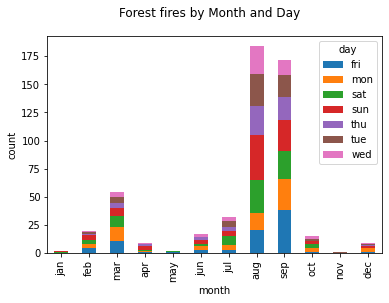

In [92]:
df_new_1.plot(kind='bar',stacked=True)
plt.suptitle('Forest fires by Month and Day');
plt.ylabel("count")

**Hint:** Before creating the bar chart, use aforementioned data aggregation tools to transform the original dataset to the data frame you need for this section. To be more specific, you need to compute the count of forest fires by months and days before plotting.

Then [build a stacked bar chart with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)

**TODO2 (not graded):** Do you notice any problem with the stacked bar chart? How do you plan to remedy this problem?

**TODO3:** Create a scatter plot of the fires with the location(X & Y) as the X and Y axis, and the size of the point indicating the area burnt. 

**Hint:** [Build a scatter plot with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)

<Figure size 640x640 with 0 Axes>

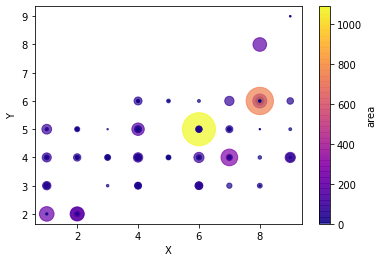

<Figure size 640x640 with 0 Axes>

In [93]:
df.plot.scatter(x= 'X', y='Y', c='area', s='area', colormap= 'plasma', alpha=0.7, sharex=False)
plt.xlabel("X")
plt.ylabel("Y")
plt.figure(figsize=(8, 8), dpi=80)

**TODO4:** Plot the scatter matrix for temp, RH, DC and DMC. How do you interpret the result in terms of correlation among the variables?

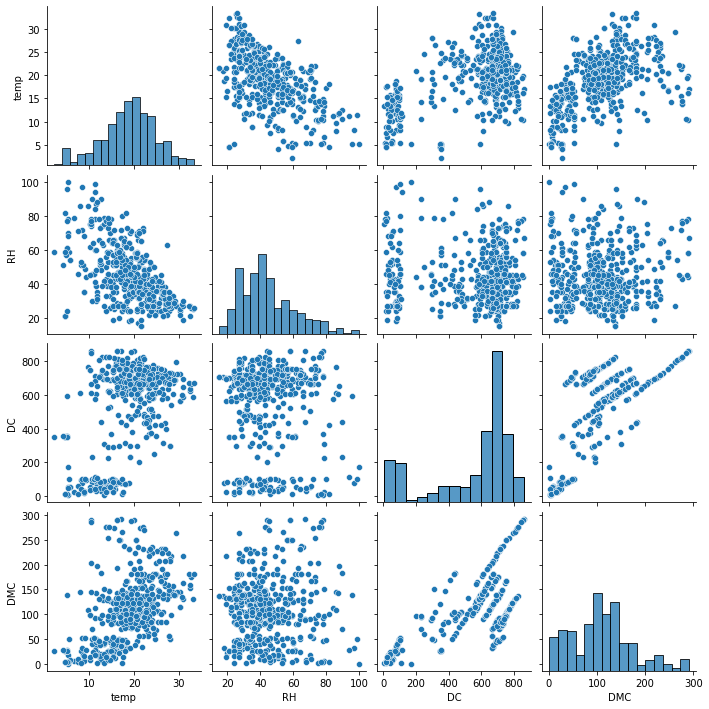

In [95]:
import seaborn as sb
corr_var = df[["temp","RH", "DC","DMC"]]
sns.pairplot(corr_var)

#It is observed that Temp is highly correlated to DC, DMC and RH. Additionally, DMC and DC is highly correlated too


**Hint:** [Creat a scatter matrix with Seaborn](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**TODO5:** Does the wind speed affect the spread of wildfire? Use visualization to back up your answer.

Text(0.5, 0, 'Wind Speed')

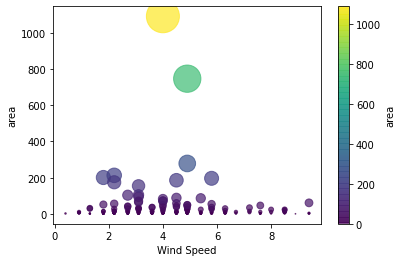

In [98]:
wind_vs_area= df[["wind","area"]]
df.plot.scatter(x= 'wind', y='area', c= 'area', s='area', colormap= 'viridis', alpha=0.7, sharex=False)
plt.xlabel("Wind Speed")

# The plot shows no significant correlation between windspeed and spread (area)


### Problem 4 (20 points)


Dataset: Graduate School Admission 

This dataset was created for Graduate Admissions prediction.

The purpose is to help students with shortlisting target universities according to their profiles. 

The predicted output gives them a fair idea about their chances of admission for a particular university.

Attribute Information: 

Serial.No.: application number: 1 to 500 

GRE.Score: GRE score: 290 to 340 

TOEFL.Score: TOEFL score: 92 to 120 

University.Rating: undergraduate school’s rating: A to E 

SOP: Statement of Purpose score: 1 to 5 

LOR: Letter of Recommendation score: 1 to 5 

CGPA: Undergraduate GPA: 6.8 to 9.92 

Research: Research experience: Yes or No 

Chance.of.Admit: Chance of getting admitted: 0.34 to 0.97

In [99]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Admission_Predict.csv") 
df.head()

Saving Admission_Predict.csv to Admission_Predict (1).csv


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,yes,0.92
1,2,324,107,4,4.0,4.5,8.87,yes,0.76
2,3,316,104,3,3.0,3.5,8.00,yes,0.72
3,4,322,110,3,3.5,2.5,8.67,yes,0.80
4,5,314,103,2,2.0,3.0,8.21,no,0.65


**TODO1:** Is LOR score related to CGPA? Use visualization to back up your answer.

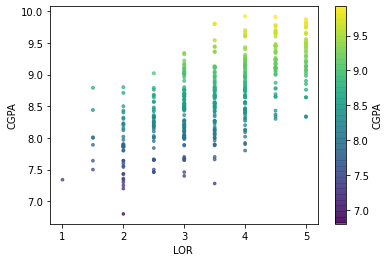

In [100]:
import matplotlib. pyplot as pt  
#pt.scatter (x=df["LOR "], y= df["CGPA"], c= df["CGPA"], sharex= False)
df.plot.scatter(x= 'LOR ', y='CGPA', c= 'CGPA', s='CGPA', colormap= 'viridis', alpha=0.7, sharex=False)

# These two are slightly correlated and hence are are linearly independent


**Hint:** Use the visualization that is used to compare 2 numerical variables

**TODO2:** 
*   Create a scatterplot of CGPA and GRE. Use color to indicate research experience. Interpret the plot. 

*   Create a scatterplot of University.Rating vs Research. Why is the plot not useful? Pick an appropriate chart type to reveal the relationship between University.Rating and Research.


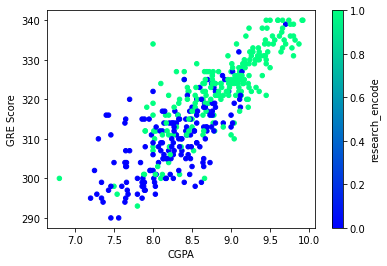

In [101]:
labelencoder = LabelEncoder()
df['research_encode'] = labelencoder.fit_transform(df['Research'])
df.plot.scatter(x= 'CGPA', y='GRE Score', c='research_encode', colormap= 'winter', sharex=False)

#Research experience is significantly correlates to high GRE and CGPA scores as we can see linear plot

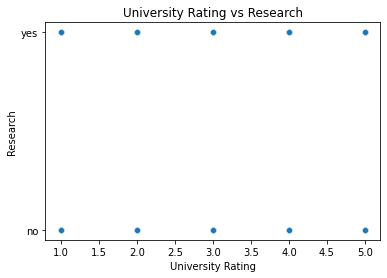

In [102]:
sns.scatterplot(data=df, x='University Rating', y='Research').set(title='University Rating vs Research');
# Research is a categorical variable and therefore scatter plot is not depicting any information.


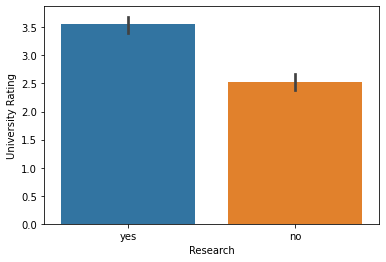

In [103]:
df.groupby('Research').agg(value=('University Rating','mean'))
sns.barplot(data=df, x='Research', y='University Rating')

**TODO3:** Plot a pie chart of University Rating. The pie chart should also present the percentage of each slice. Explain your findings. *(Make sure you show data labels)*

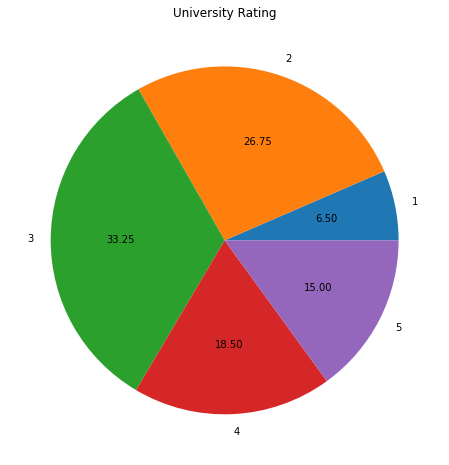

In [ ]:
df_new_2=df.groupby('University Rating').agg(count=('Serial No.','count')).reset_index()
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(df_new_2['count'], labels=df_new_2['University Rating'], autopct='%.2f');
ax.set_title('University Rating');

# Most universities have rating 3, 
# Less percentage of Universities have 1 rating



**Hint:** [Build a pie chart with Matplotlib](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html)

[Build a pie chart with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

**TODO4:** What other insights can you draw from this dataset? Present one finding with visualization.

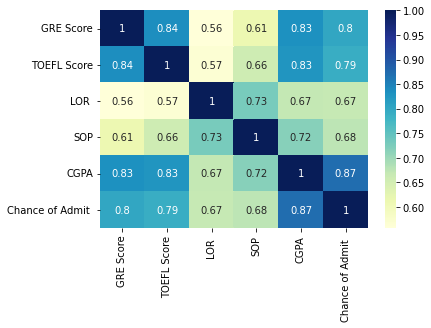

In [ ]:
import seaborn as sb
corr_var = df[["GRE Score","TOEFL Score", "LOR ","SOP", "CGPA", "Chance of Admit "]]
#sns.pairplot(corr_var)
corr_var_plot = sb.heatmap(corr_var.corr(), cmap="YlGnBu", annot=True)

#chance of admit is highly correlayted to GRE, TOEFL, LOR, SOP and CGPA, CGPA being the highest one.